# Imports

In [2]:
import json
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib_venn import venn3

# Dritter Teil
## Auswertung der Zitierungen

Im Folgenden werden die Namen der referenzierten Autor*innen gezählt und schließlich übersichtlich zur Auswertung dargestellt.

### Einlesen der Daten und Erstellen von Autorenliste und Dictionary

In [3]:
# Öffnen der Referenz-Autoren-Datei und Einlesen aller referenzierten Autoren in eine Liste 'autorenliste'
with open("referenz_autoren.json", "r", encoding="utf-8") as f:
    autoren = json.load(f)

autoren_liste = [autor for eintrag in autoren.values() for autor in eintrag.get("authors", [])]
# print(autoren_liste)

In [4]:
anzahl_autoren = Counter(autoren_liste)

#print(anzahl_autoren)

### Aussortieren aller einmaliger Referenzen
Wenn ein\*e Autor\*in nur einmal in allen Artikeln erwähnt wurde, würd diese rausgeworfen

In [7]:
cleared_anzahl_autoren = {}

for autor in anzahl_autoren:
    if anzahl_autoren[autor] > 1:
        cleared_anzahl_autoren[autor] = anzahl_autoren[autor]
        
cleared_anzahl_autoren = Counter(cleared_anzahl_autoren)
#print(cleared_anzahl_autoren)

#for key, value in cleared_anzahl_autoren.items():
 #   print(key, value)

### Tabelle 1: Am häufigsten referenzierte Autor\*innen

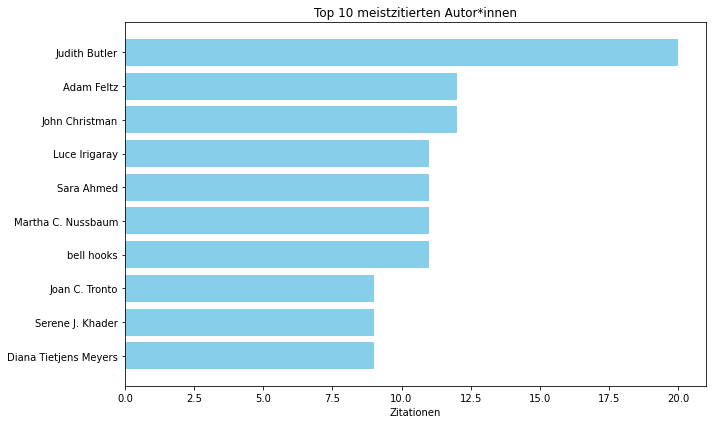

In [8]:
# Balkendiagramm mit Matplotlib
# Daten vorbereiten
top_autoren = anzahl_autoren.most_common(10)
autoren, counts = zip(*top_autoren)

#Plot
plt.figure(figsize=(10,6))
plt.barh(autoren, counts, color="skyblue")
plt.xlabel("Zitationen")
plt.title("Top 10 meistzitierten Autor*innen")
plt.gca().invert_yaxis() # Höchste zuerst

plt.tight_layout()
plt.show()

### Tabelle 2: Häufigkeit des Vorkommens der Schnittmengenautor\*innen

In [9]:
def haeufigkeiten_von(liste):
    erwaehnungs_liste = []
    for autor in autoren_liste:
        if autor in liste:
            erwaehnungs_liste.append(autor)
    return Counter(erwaehnungs_liste)

In [10]:
schnittmengenautoren = ["Simone de Beauvoir", "Gayle Rubin", "Audre Lorde", "Adrienne Rich", "Monique Wittig", "Patrícia Hill Collins", "Judith Butler", "Gayatri Chakravorty Spivak", "Hannah Arendt"]

In [11]:
schnittmengenautoren_dictionary = haeufigkeiten_von(schnittmengenautoren)
print(schnittmengenautoren_dictionary)

Counter({'Judith Butler': 20, 'Gayatri Chakravorty Spivak': 8, 'Hannah Arendt': 7, 'Simone de Beauvoir': 4, 'Audre Lorde': 3, 'Patrícia Hill Collins': 2, 'Adrienne Rich': 1, 'Monique Wittig': 1})


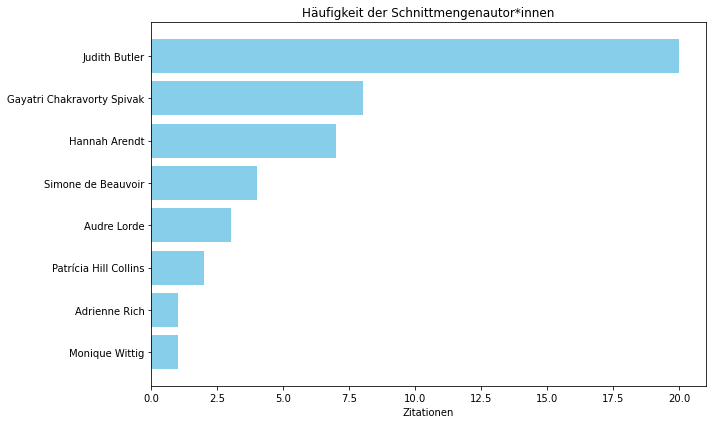

In [12]:
# Balkendiagramm mit Matplotlib
# Daten vorbereiten
top_autoren = schnittmengenautoren_dictionary.most_common()
autoren, counts = zip(*top_autoren)

#Plot
plt.figure(figsize=(10,6))
plt.barh(autoren, counts, color="skyblue")
plt.xlabel("Zitationen")
plt.title("Häufigkeit der Schnittmengenautor*innen")
plt.gca().invert_yaxis() # Höchste zuerst
plt.tight_layout()
plt.show()

### Tabelle 3: Buch 1 - Modern Feminist Theory. An Introduction

In [13]:
buch_eins = ["Virginia Woolf", "Simone de Beauvoir", "Kate Millett", "Shulamith Firestone", "Radicalesbians", "Mary Daly", "Audre Lorde", "Alice Walker", "Patrícia Hill Collins", "Luce Irigaray", "Hélène Cixous", "Monique Wittig", "Julia Kristeva", "Gayle Rubin", "Gayatri Chakravorty Spivak", "Adrienne Rich", "Judith Butler", "Eve Kosofsky Sedgwick", "Wayne Koestenbaum"]

In [14]:
buch_eins_dictionary = haeufigkeiten_von(buch_eins)
print(buch_eins_dictionary)

Counter({'Judith Butler': 20, 'Luce Irigaray': 11, 'Gayatri Chakravorty Spivak': 8, 'Eve Kosofsky Sedgwick': 6, 'Simone de Beauvoir': 4, 'Alice Walker': 3, 'Julia Kristeva': 3, 'Audre Lorde': 3, 'Patrícia Hill Collins': 2, 'Adrienne Rich': 1, 'Monique Wittig': 1, 'Hélène Cixous': 1})


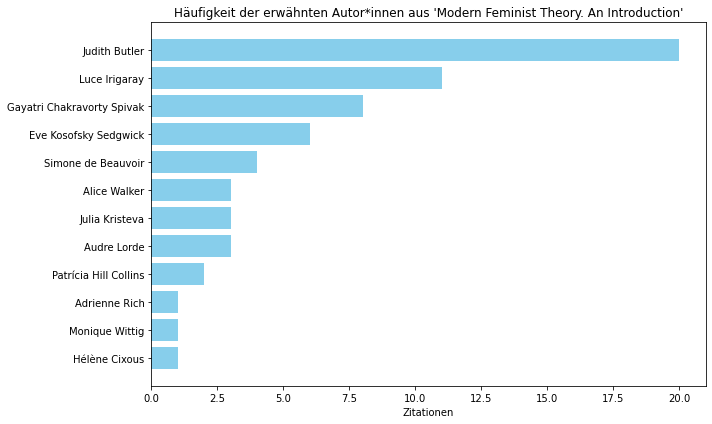

In [15]:
# Balkendiagramm mit Matplotlib
# Daten vorbereiten
top_autoren = buch_eins_dictionary.most_common()
autoren, counts = zip(*top_autoren)

#Plot
plt.figure(figsize=(10,6))
plt.barh(autoren, counts, color="skyblue")
plt.xlabel("Zitationen")
plt.title("Häufigkeit der erwähnten Autor*innen aus 'Modern Feminist Theory. An Introduction'")
plt.gca().invert_yaxis() # Höchste zuerst
plt.tight_layout()
plt.show()

### Tabelle 4: Buch 2 - Feminist Theory Reader

In [16]:
buch_zwei = ["Simone de Beauvoir", "Gayle Rubin", "Joan Scott", "Audre Lorde", "Kimberlé Crenshaw", "Adrienne Rich", "Gloria Anzaldúa", "Karl Marx", "Edward Said", "Walter Mignolo", "Monique Wittig", "Patrícia Hill Collins", "Chandra Talpade Mohanty", "Chela Sandoval", "Michel Focault", "Judith Butler", "Avery Gordon", "Anna Lowenhaupt Tsing", "Gayatri Chakravorty Spivak", "Vandana Shiva"] # Liste der vorkommenden Autor*innen

In [17]:
buch_zwei_dictionary = haeufigkeiten_von(buch_zwei) # Erstellen des Dictionarys mit der haeufigkeiten_von - Funktion
print(buch_zwei_dictionary)

Counter({'Judith Butler': 20, 'Gayatri Chakravorty Spivak': 8, 'Chandra Talpade Mohanty': 7, 'Simone de Beauvoir': 4, 'Gloria Anzaldúa': 3, 'Audre Lorde': 3, 'Patrícia Hill Collins': 2, 'Adrienne Rich': 1, 'Vandana Shiva': 1, 'Monique Wittig': 1})


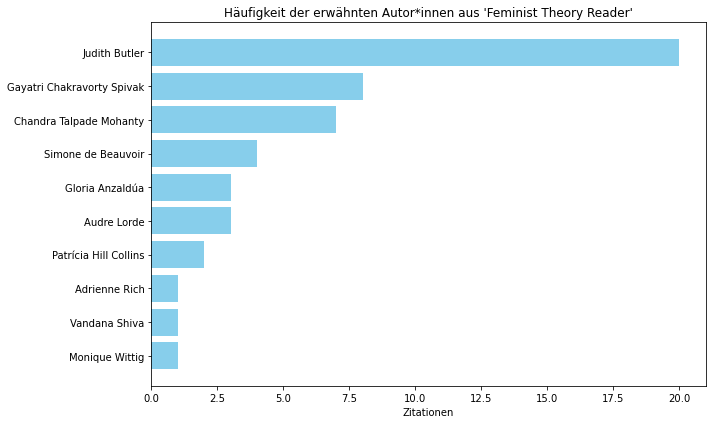

In [18]:
# Balkendiagramm mit Matplotlib
# Daten vorbereiten
top_autoren = buch_zwei_dictionary.most_common()
autoren, counts = zip(*top_autoren)

#Plot
plt.figure(figsize=(10,6))
plt.barh(autoren, counts, color="skyblue")
plt.xlabel("Zitationen")
plt.title("Häufigkeit der erwähnten Autor*innen aus 'Feminist Theory Reader'")
plt.gca().invert_yaxis() # Höchste zuerst
plt.tight_layout()
plt.show()

### Schnittmengendarstellung

In [19]:
# Liste der Top 20 meist zitierten Autor*innen
top_20 = [autor for autor, zahl in anzahl_autoren.most_common(20)]
print(top_20)

['Judith Butler', 'Adam Feltz', 'John Christman', 'Luce Irigaray', 'Sara Ahmed', 'Martha C. Nussbaum', 'bell hooks', 'Joan C. Tronto', 'Serene J. Khader', 'Diana Tietjens Meyers', 'Immanuel Kant', 'Edward T. Cokely', 'Nancy Fraser', 'Daniel Engster', 'Gayatri Chakravorty Spivak', 'Kristie Dotson', 'Sara Heinämaa', 'Hannah Arendt', 'Fiona Robinson', 'Matthew Ratcliffe']


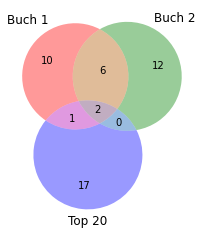

In [20]:
set1 = set(buch_eins)
set2 = set(buch_zwei)
set3 = set(top_20)

venn3([set1, set2, set3], ('Buch 1', 'Buch 2', 'Top 20'))
plt.show()

In [21]:
# Liste aller mehr als einmal zitierten Autor*innen
zitierte_autoren = [autor for autor, zahl in cleared_anzahl_autoren.most_common()]

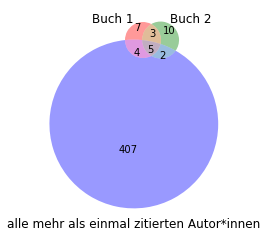

In [22]:
set1 = set(buch_eins)
set2 = set(buch_zwei)
set3 = set(zitierte_autoren)

venn3([set1, set2, set3], ('Buch 1', 'Buch 2', 'alle mehr als einmal zitierten Autor*innen'))
plt.show()

#### Tabellen mit Pandas

In [23]:
df_buch_eins = pd.DataFrame(buch_eins_dictionary.most_common(), columns=["Autor", "Zahl"])
print(df_buch_eins)

                         Autor  Zahl
0                Judith Butler    20
1                Luce Irigaray    11
2   Gayatri Chakravorty Spivak     8
3        Eve Kosofsky Sedgwick     6
4           Simone de Beauvoir     4
5                 Alice Walker     3
6               Julia Kristeva     3
7                  Audre Lorde     3
8        Patrícia Hill Collins     2
9                Adrienne Rich     1
10              Monique Wittig     1
11               Hélène Cixous     1


In [24]:
df_buch_zwei = pd.DataFrame(buch_zwei_dictionary.most_common(), columns=["Autor", "Zahl"])
print(df_buch_zwei)

                        Autor  Zahl
0               Judith Butler    20
1  Gayatri Chakravorty Spivak     8
2     Chandra Talpade Mohanty     7
3          Simone de Beauvoir     4
4             Gloria Anzaldúa     3
5                 Audre Lorde     3
6       Patrícia Hill Collins     2
7               Adrienne Rich     1
8               Vandana Shiva     1
9              Monique Wittig     1


In [25]:
# Welche der häufigsten Autor*innen kamen in den Büchern garnicht vor?
print("Top 10 meist zitierten Autor*innen:")
for autor, zahl in anzahl_autoren.most_common(10):
    if autor in schnittmengenautoren:
        print(autor, " kommt sowohl in Buch1 als auch in Buch 2 vor.")
    elif autor in buch_eins:
        print(autor, " kommt nur in Buch1 vor.")
    elif autor in buch_zwei:
        print(autor, " kommt nur in Buch2 vor.")
    else:
        print(autor, " wird in keinem der beiden Bücher erwähnt.")

Top 10 meist zitierten Autor*innen:
Judith Butler  kommt sowohl in Buch1 als auch in Buch 2 vor.
Adam Feltz  wird in keinem der beiden Bücher erwähnt.
John Christman  wird in keinem der beiden Bücher erwähnt.
Luce Irigaray  kommt nur in Buch1 vor.
Sara Ahmed  wird in keinem der beiden Bücher erwähnt.
Martha C. Nussbaum  wird in keinem der beiden Bücher erwähnt.
bell hooks  wird in keinem der beiden Bücher erwähnt.
Joan C. Tronto  wird in keinem der beiden Bücher erwähnt.
Serene J. Khader  wird in keinem der beiden Bücher erwähnt.
Diana Tietjens Meyers  wird in keinem der beiden Bücher erwähnt.


In [26]:
# Welche der häufigsten Autor*innen kamen in den Büchern garnicht vor?
print("Top 20 meist zitierten Autor*innen:")
for autor, zahl in anzahl_autoren.most_common(20):
    if autor in schnittmengenautoren:
        print("Buch 1, Buch 2 : ", autor)
    elif autor in buch_eins:
        print("Buch 1         : ", autor)
    elif autor in buch_zwei:
        print("Buch 2         : ", autor)
    else:
        print("keine Erwähnung: ", autor)

Top 20 meist zitierten Autor*innen:
Buch 1, Buch 2 :  Judith Butler
keine Erwähnung:  Adam Feltz
keine Erwähnung:  John Christman
Buch 1         :  Luce Irigaray
keine Erwähnung:  Sara Ahmed
keine Erwähnung:  Martha C. Nussbaum
keine Erwähnung:  bell hooks
keine Erwähnung:  Joan C. Tronto
keine Erwähnung:  Serene J. Khader
keine Erwähnung:  Diana Tietjens Meyers
keine Erwähnung:  Immanuel Kant
keine Erwähnung:  Edward T. Cokely
keine Erwähnung:  Nancy Fraser
keine Erwähnung:  Daniel Engster
Buch 1, Buch 2 :  Gayatri Chakravorty Spivak
keine Erwähnung:  Kristie Dotson
keine Erwähnung:  Sara Heinämaa
Buch 1, Buch 2 :  Hannah Arendt
keine Erwähnung:  Fiona Robinson
keine Erwähnung:  Matthew Ratcliffe


In [27]:
# Welche der häufigsten Autor*innen kamen in den Büchern garnicht vor?
buch_eins_erwaehnung = []
buch_zwei_erwaehnung = []
beide_erwaehnung = []
keine_erwaehnung = []
for autor, zahl in anzahl_autoren.most_common(15):
    if autor in schnittmengenautoren:
        beide_erwaehnung.append(autor)
    elif autor in buch_eins:
        buch_eins_erwaehnung.append(autor)
    elif autor in buch_zwei:
        buch_zwei_eraehnung.append(autor)
    else:
        keine_erwaehnung.append(autor)
print(beide_erwaehnung, ":", len(beide_erwaehnung), buch_eins_erwaehnung, ":", len(buch_eins_erwaehnung), buch_zwei_erwaehnung, ":", len(buch_zwei_erwaehnung), keine_erwaehnung, ":", len(keine_erwaehnung))

['Judith Butler', 'Gayatri Chakravorty Spivak'] : 2 ['Luce Irigaray'] : 1 [] : 0 ['Adam Feltz', 'John Christman', 'Sara Ahmed', 'Martha C. Nussbaum', 'bell hooks', 'Joan C. Tronto', 'Serene J. Khader', 'Diana Tietjens Meyers', 'Immanuel Kant', 'Edward T. Cokely', 'Nancy Fraser', 'Daniel Engster'] : 12
